In [106]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
import time

# Part 2: Gaussian Filtering

## Question 2.1

In [ ]:
def boxfilter(n):
    try:
        assert n % 2 == 1
        array = np.ones((n,n))
        array = array / (n*n)
        return array
    except AssertionError as error:
        print("AssertionError: Dimension must be odd, dimension given is {}".format(n))

print(boxfilter(3))
boxfilter_4 = boxfilter(4)
print(boxfilter(5))

## Question 2.2

In [ ]:
def gauss1d(sigma):
    # filter length is sigma*6 rounded up to the next odd int
    filter_len = round(sigma * 6)
    if filter_len % 2 == 0:
        filter_len += 1
    
    # create 1D array, where x is distance away from center
    filter = np.arange(start=-np.floor(filter_len/2), stop=np.ceil(filter_len/2))
    
    # pass array through gaussian density function
    filter = np.exp(-filter**2 / (2*sigma**2))
    
    # normalize and return
    filter = filter/np.sum(filter)
    return filter
    
print(gauss1d(0.3))
print(gauss1d(0.5))
print(gauss1d(1))
print(gauss1d(2))

## Question 2.3

In [ ]:
def gauss2d(sigma):
    # create 1D gaussian
    filter1d = gauss1d(sigma)[:,np.newaxis]
    # create 2D gaussian by convolution of 1D gaussian w/ its transpose
    filter2d = signal.convolve2d(filter1d, filter1d.T)
    return filter2d

print(gauss2d(0.5))
print(gauss2d(1))

## Question 2.4

In [ ]:
def convolve2d_manual(array, filter):
    # Output image
    image_out = np.zeros_like(array)
    
    # Add zero padding to the input image
    padding = int(np.floor(filter.shape[0]/2))
    image_padded = np.zeros((array.shape[0] + 2*padding, array.shape[1] + 2*padding))    
    image_padded[padding:-padding, padding:-padding] = array
    
    # Loop through each neighbourhood and calculate new pixel value
    filtersz = filter.shape[0]
    for i in range(array.shape[1]):
        for j in range(array.shape[0]):
            image_out[j, i] = np.sum(filter * image_padded[j:j+filtersz, i:i+filtersz])
    return image_out

def gaussconvolve2d_manual(array,sigma):
    # Create 2D gaussian filter and apply convolution
    filter = gauss2d(sigma)
    filtered_image = convolve2d_manual(array, filter)
    return filtered_image

# Load image and convert to grayscale
coloured_image = cv2.imread("dog.jpg")
grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
filtered_image = gaussconvolve2d_manual(grey_image, 3)

print("Original image:")
plt.imshow(grey_image, cmap="gray")
plt.show()
print("Filtered image:")
plt.imshow(filtered_image, cmap="gray")
plt.show()

## Question 2.5
In this case, correlate2d and convolve2d return the same results because our 2D Gaussian filter is symmetric both horizontally and vertically. If the filter were not symmetric, the two functions would not return the same results.

In [ ]:
def gaussconvolve2d_scipy(array,sigma):
    filter = gauss2d(sigma)
    filtered_img = signal.convolve2d(array,filter,'same')
    return filtered_img

# Load image and convert to grayscale
coloured_image = cv2.imread("dog.jpg")
grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
filtered_image = gaussconvolve2d_scipy(grey_image, 3)

print("Original image:")
plt.imshow(grey_image, cmap="gray")
plt.show()
print("Filtered image:")
plt.imshow(filtered_image, cmap="gray")
plt.show()

## Question 2.6
The SciPy implementation is clearly faster when sigma=10. It may be possible that the scipy implementation uses various convolution speed-up techniques such as taking the logarithm so that multiplications become additions, or using Fourier transforms to reduce convolutions to complex multiplication. My manual implementation does not implement any of these techniques, and hence is likely why it runs slower.

In [ ]:
# Load image and convert to grayscale
coloured_image = cv2.imread("dog.jpg")
grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)

start_time = time.time() # start timestamp
filtered_image = gaussconvolve2d_manual(grey_image, 10)
duration_manual = time.time() - start_time # duration in seconds

start_time = time.time() # start timestamp
filtered_image = gaussconvolve2d_scipy(grey_image, 10)
duration_scipy = time.time() - start_time # duration in seconds

print("Manual implementation runtime: {} seconds".format(duration_manual))
print("SciPy implementation runtime: {} seconds".format(duration_scipy))

## Question 2.7
An implementation of the 2D Gaussian filter using convolution would be more efficient, because we can use 1D convolutions instead of 2D convolutions. We can first convolve each row with a 1D filter, and then convolve each column with a 1D filter. This works because the 2D Gaussian filter can be expressed as an outer product of two 1D filters (one as a function of x, the other as a function of y).

The naive implementation would need m^2 * n^2 multiplications, where m is the size of the window and n is the size of the image. A separable implementation only needs 2m * n^2 multiplications.

## Question 2.7
An implementation of the 2D Gaussian filter using convolution would be more efficient, because we can use 1D convolutions instead of 2D convolutions. We can first convolve each row with a 1D filter, and then convolve each column with a 1D filter. This works because the 2D Gaussian filter can be expressed as an outer product of two 1D filters (one as a function of x, the other as a function of y).

The naive implementation would need m^2 * n^2 multiplications, where m is the size of the window and n is the size of the image. A separable implementation only needs 2m * n^2 multiplications.

## Question 2.1

In [27]:
def boxfilter(n):
    try:
        assert n % 2 == 1
        array = np.ones((n,n))
        array = array / (n*n)
        return array
    except AssertionError as error:
        print("AssertionError: Dimension must be odd, dimension given is {}".format(n))

print(boxfilter(3))
boxfilter_4 = boxfilter(4)
print(boxfilter(5))

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
AssertionError: Dimension must be odd, dimension given is 4
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


## Question 2.2

In [55]:
def gauss1d(sigma):
    # filter length is sigma*6 rounded up to the next odd int
    filter_len = round(sigma * 6)
    if filter_len % 2 == 0:
        filter_len += 1
    
    # create 1D array, where x is distance away from center
    filter = np.arange(start=-np.floor(filter_len/2), stop=np.ceil(filter_len/2))
    
    # pass array through gaussian density function
    filter = np.exp(-filter**2 / (2*sigma**2))
    
    # normalize and return
    filter = filter/np.sum(filter)
    return filter
    
print(gauss1d(0.3))
print(gauss1d(0.5))
print(gauss1d(1))
print(gauss1d(2))

[0.00383626 0.99232748 0.00383626]
[0.10650698 0.78698604 0.10650698]
[0.00443305 0.05400558 0.24203623 0.39905028 0.24203623 0.05400558
 0.00443305]
[0.0022182  0.00877313 0.02702316 0.06482519 0.12110939 0.17621312
 0.19967563 0.17621312 0.12110939 0.06482519 0.02702316 0.00877313
 0.0022182 ]


## Question 2.3

In [67]:
def gauss2d(sigma):
    # create 1D gaussian
    filter1d = gauss1d(sigma)[:,np.newaxis]
    # create 2D gaussian by convolution of 1D gaussian w/ its transpose
    filter2d = signal.convolve2d(filter1d, filter1d.T)
    return filter2d

print(gauss2d(0.5))
print(gauss2d(1))

[[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]
[[1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [1.76900911e-03 2.15509428e-02 9.65846250e-02 1.59241126e-01
  9.65846250e-02 2.15509428e-02 1.76900911e-03]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]]


## Question 2.4

Original image:


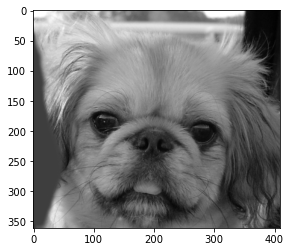

Filtered image:


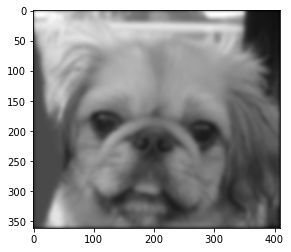

In [104]:
def convolve2d_manual(array, filter):
    # Output image
    image_out = np.zeros_like(array)
    
    # Add zero padding to the input image
    padding = int(np.floor(filter.shape[0]/2))
    image_padded = np.zeros((array.shape[0] + 2*padding, array.shape[1] + 2*padding))    
    image_padded[padding:-padding, padding:-padding] = array
    
    # Loop through each neighbourhood and calculate new pixel value
    filtersz = filter.shape[0]
    for i in range(array.shape[1]):
        for j in range(array.shape[0]):
            image_out[j, i] = np.sum(filter * image_padded[j:j+filtersz, i:i+filtersz])
    return image_out

def gaussconvolve2d_manual(array,sigma):
    # Create 2D gaussian filter and apply convolution
    filter = gauss2d(sigma)
    filtered_image = convolve2d_manual(array, filter)
    return filtered_image

# Load image and convert to grayscale
coloured_image = cv2.imread("dog.jpg")
grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
filtered_image = gaussconvolve2d_manual(grey_image, 3)

print("Original image:")
plt.imshow(grey_image, cmap="gray")
plt.show()
print("Filtered image:")
plt.imshow(filtered_image, cmap="gray")
plt.show()

## Question 2.5
In this case, correlate2d and convolve2d return the same results because our 2D Gaussian filter is symmetric both horizontally and vertically. If the filter were not symmetric, the two functions would not return the same results.

Original image:


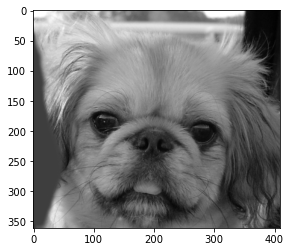

Filtered image:


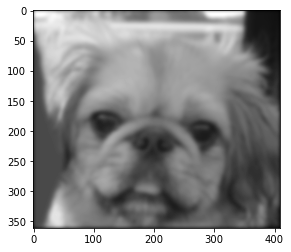

In [105]:
def gaussconvolve2d_scipy(array,sigma):
    filter = gauss2d(sigma)
    filtered_img = signal.convolve2d(array,filter,'same')
    return filtered_img

# Load image and convert to grayscale
coloured_image = cv2.imread("dog.jpg")
grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
filtered_image = gaussconvolve2d_scipy(grey_image, 3)

print("Original image:")
plt.imshow(grey_image, cmap="gray")
plt.show()
print("Filtered image:")
plt.imshow(filtered_image, cmap="gray")
plt.show()

## Question 2.6
The SciPy implementation is clearly faster when sigma=10. It may be possible that the scipy implementation uses various convolution speed-up techniques such as taking the logarithm so that multiplications become additions, or using Fourier transforms to reduce convolutions to complex multiplication. My manual implementation does not implement any of these techniques, and hence is likely why it runs slower.

In [114]:
# Load image and convert to grayscale
coloured_image = cv2.imread("dog.jpg")
grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)

start_time = time.time() # start timestamp
filtered_image = gaussconvolve2d_manual(grey_image, 10)
duration_manual = time.time() - start_time # duration in seconds

start_time = time.time() # start timestamp
filtered_image = gaussconvolve2d_scipy(grey_image, 10)
duration_scipy = time.time() - start_time # duration in seconds

print("Manual implementation runtime: {} seconds".format(duration_manual))
print("SciPy implementation runtime: {} seconds".format(duration_scipy))

Manual implementation runtime: 3.390631675720215 seconds
SciPy implementation runtime: 2.2136220932006836 seconds


## Question 2.7
An implementation of the 2D Gaussian filter using convolution would be more efficient, because we can use 1D convolutions instead of 2D convolutions. We can first convolve each row with a 1D filter, and then convolve each column with a 1D filter. This works because the 2D Gaussian filter can be expressed as an outer product of two 1D filters (one as a function of x, the other as a function of y).

The naive implementation would need m^2 * n^2 multiplications, where m is the size of the window and n is the size of the image. A separable implementation only needs 2m * n^2 multiplications.